#Τεχνικές Εξόρυξης Δεδομένων - Εργασία 1

* Μασούρας Νικόλαος (sdi1800112)
* Σακαρέλλος Ιωάννης (sdi1800167)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')
location = r'/content/gdrive/MyDrive/Data Mining/hw1/eclass_all_with_sentiment_v2.pkl'
dataAll = pd.read_pickle(location)
dataAll.head()

Mounted at /content/gdrive


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,NEU
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,NEG
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,NEU
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,NEU
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NEG


##**Ερώτημα 1: Προεπεξεργασία και καθάρισμα των δεδομένων**

Αρχικά αφαιρούμε όλες τις σειρές που περιέχουν κάποια κενή τιμή σε στήλη όπου αυτό δεν επιτρέπεται. Στη συνέχεια "καθαρίζουμε" τα δεδομένα της στήλης text μετατρέποντας όλους τους χαρακτήρες σε μικρούς και αφαιρώντας σύμβολα, σημεία στίξης και stopwords.

In [ ]:
import nltk

from nltk.corpus import stopwords


nltk.download('stopwords')

STOP_WORDS = stopwords.words()

dataAll["text"] = dataAll["text"].str.lower()
dataAll["text"].replace(r"https?://\S+|www\.\S+", "", regex=True, inplace=True)
dataAll["text"].replace(r'-', ' ', regex=True, inplace=True)
dataAll["text"].replace(r'_', ' ', regex=True, inplace=True)
dataAll["text"].replace(r'[^\w\s@#]', '', regex=True, inplace=True)
dataAll["text"].replace(r"@\w{4,15}", "", regex=True, inplace=True)
dataAll["text"].replace(r'#|@', '', regex=True, inplace=True)
dataAll["text"].replace(r"\d{1,}", "", regex=True, inplace=True)
dataAll["text"].replace(r"\s{1,}", " ", regex=True, inplace=True)
dataAll['text'] = dataAll['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))

dataAll.replace(r'^\s*$', float('NaN'), regex=True,inplace=True)
dataAll = dataAll.dropna(subset=['id', 'text', 'sentiment'])

dataAll = dataAll[(dataAll['sentiment'] == "NEU") | (dataAll['sentiment'] == "POS") | (dataAll['sentiment'] == "NEG")]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Στη συνέχεια, χωρίζουμε τα δεδομένα σε train και test sets και τα αποθηκεύουμε σε .csv αρχεία. Επειδή ο όγκος των δεδομένων ήταν πολύ μεγάλος και η εξαγωγή αποτελεσμάτων ήταν υπερβολικά χρονοβόρα (>8 ώρες, χωρίς αποτέλεσμα), για τα ερωτήματα 3 και 4 χρησιμοποιήσαμε μόνο το 10% των συνολικών δεδομένων.

In [ ]:
from sklearn.model_selection import train_test_split

sampleData = dataAll.sample(frac=0.1)

train, test = train_test_split(sampleData, train_size=0.8)

In [ ]:
train.to_csv('/content/gdrive/MyDrive/Data Mining/hw1/train.csv', header=True, index=False,columns = ['id','text','sentiment'])
test.to_csv('/content/gdrive/MyDrive/Data Mining/hw1/test.csv', header=True, index=False,columns = ['id','text','sentiment'])

##**Ερώτημα 2: Ανάλυση των δεδομένων**

###Ερώτημα 2.1

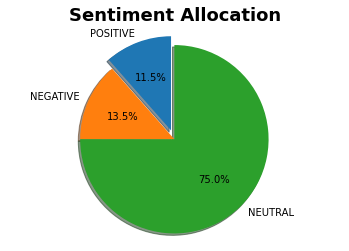

In [ ]:
import matplotlib.pyplot as plt

count = dataAll['sentiment'].value_counts()
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [count['POS']/dataAll.shape[0]*100, count['NEG']/dataAll.shape[0]*100, count['NEU']/dataAll.shape[0]*100]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Sentiment Allocation", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 2.2

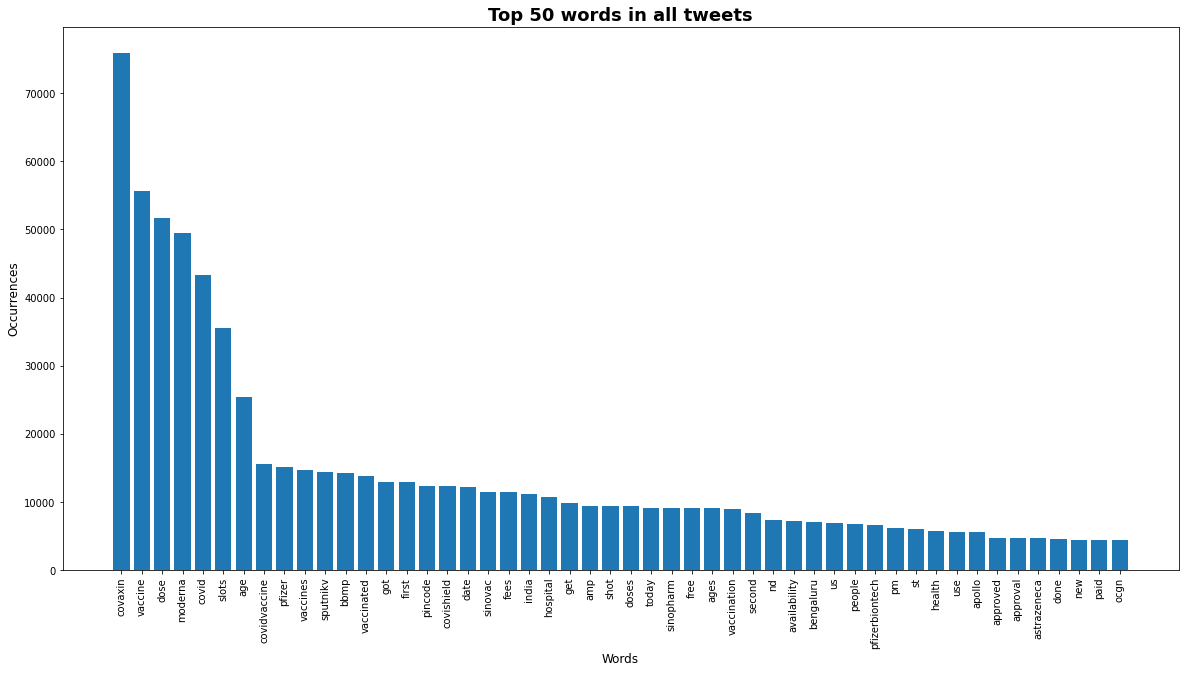

In [ ]:
from collections import Counter

word_count = Counter(" ".join(dataAll["text"]).split()).most_common(50)
word_frequency = pd.DataFrame(word_count, columns=['Word', 'Frequency'])
plt.figure(figsize=(20, 10))
plt.bar(word_frequency['Word'], word_frequency['Frequency'])
plt.xticks(rotation=90)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.title("Top 50 words in all tweets", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 2.3

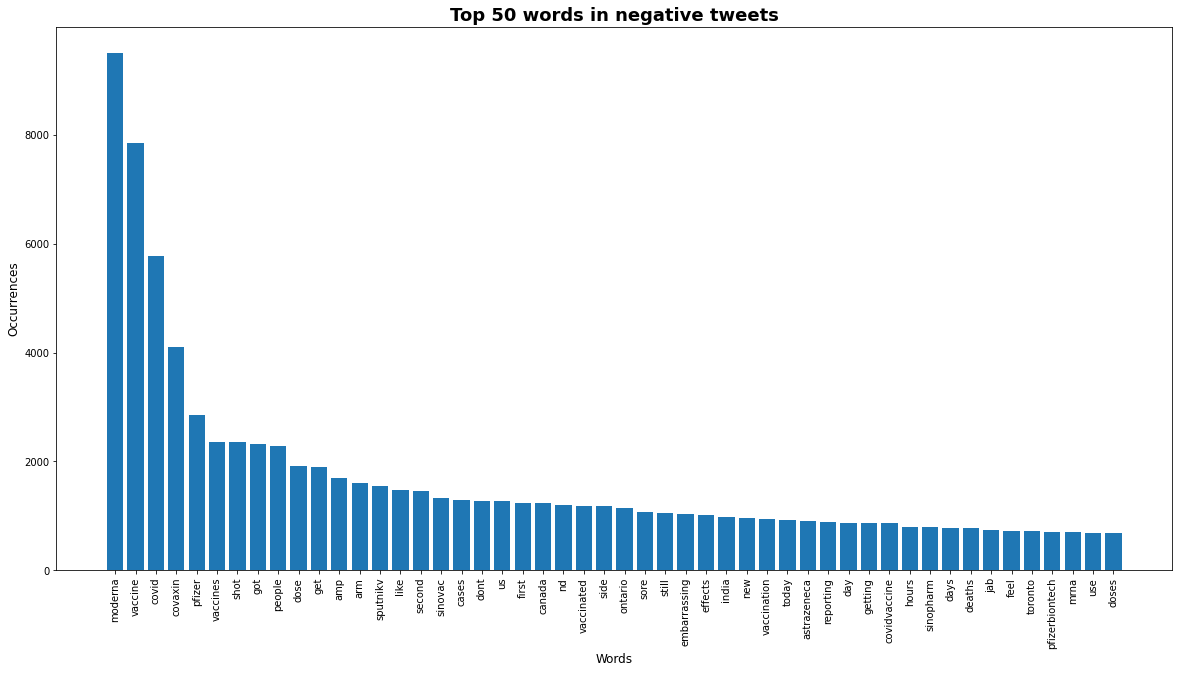

In [ ]:
word_count = Counter(" ".join(dataAll["text"].loc[dataAll["sentiment"] == "NEG"]).split()).most_common(50)
word_frequency = pd.DataFrame(word_count, columns=['Word', 'Frequency'])
plt.figure(figsize=(20, 10))
plt.bar(word_frequency['Word'], word_frequency['Frequency'])
plt.xticks(rotation=90)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.title("Top 50 words in negative tweets", fontsize=18, fontweight="bold")
plt.show()

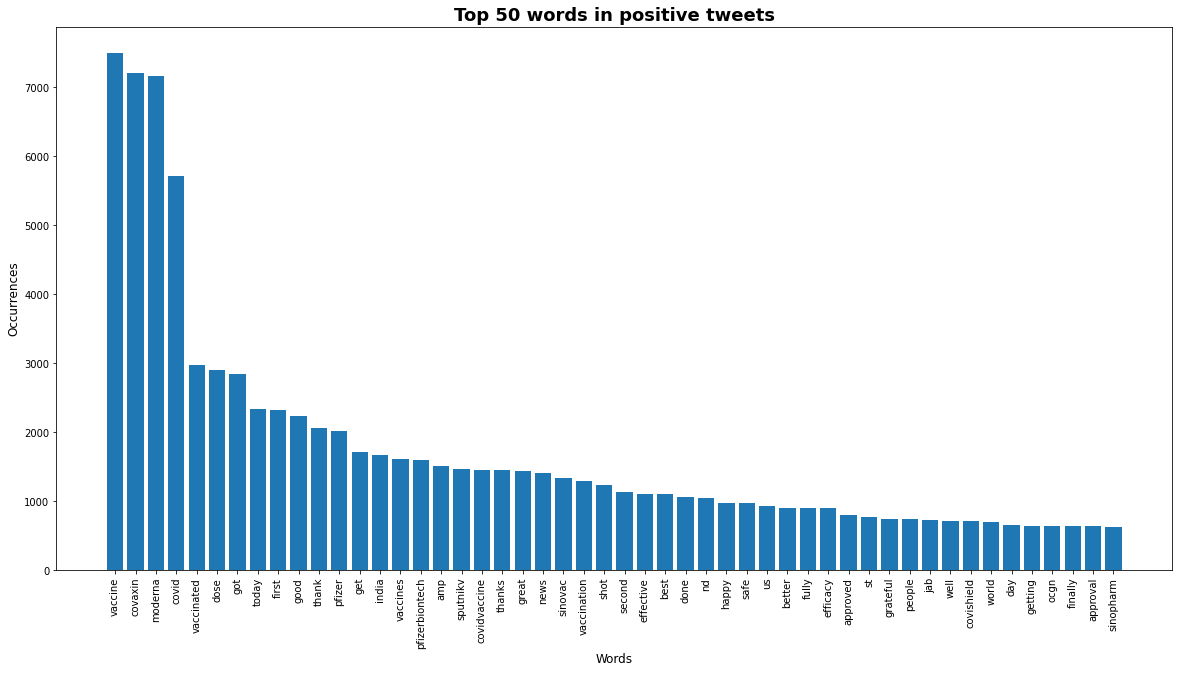

In [ ]:
word_count = Counter(" ".join(dataAll["text"].loc[dataAll["sentiment"] == "POS"]).split()).most_common(50)
word_frequency = pd.DataFrame(word_count, columns=['Word', 'Frequency'])
plt.figure(figsize=(20, 10))
plt.bar(word_frequency['Word'], word_frequency['Frequency'])
plt.xticks(rotation=90)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.title("Top 50 words in positive tweets", fontsize=18, fontweight="bold")
plt.show()

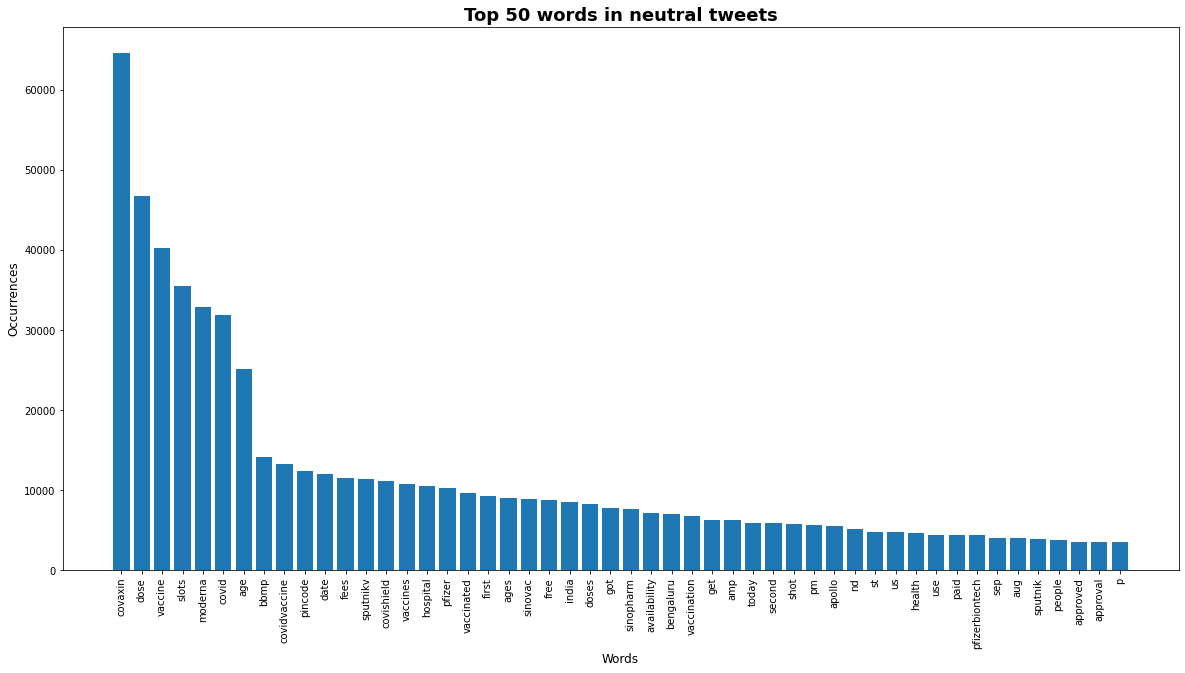

In [ ]:
word_count = Counter(" ".join(dataAll["text"].loc[dataAll["sentiment"] == "NEU"]).split()).most_common(50)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
plt.figure(figsize=(20, 10))
plt.bar(word_frequency['Word'], word_frequency['Frequency'])
plt.xticks(rotation = 90)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Occurrences", fontsize=12)
plt.title("Top 50 words in neutral tweets", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 2.4

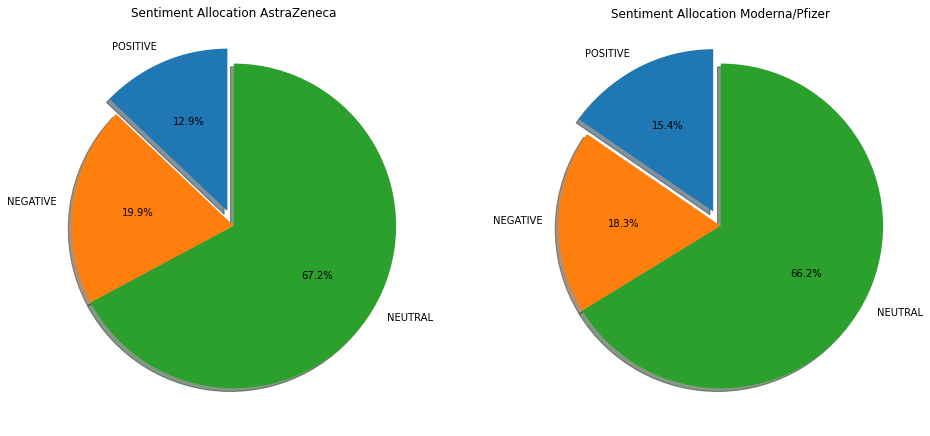

In [ ]:
tweets_astra = dataAll[dataAll["text"].str.contains("astrazeneca")]
count_astra = tweets_astra['sentiment'].value_counts()
sizes_astra = [count_astra['POS']/tweets_astra.shape[0]*100, count_astra['NEG']/tweets_astra.shape[0]*100, count_astra['NEU']/tweets_astra.shape[0]*100]

tweets_other = dataAll[dataAll["text"].str.contains("moderna|pfizer|biontech")]
count_other = tweets_other['sentiment'].value_counts()
sizes_other = [count_other['POS']/tweets_other.shape[0]*100, count_other['NEG']/tweets_other.shape[0]*100, count_other['NEU']/tweets_other.shape[0]*100]


labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'

explode = (0.1, 0, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16))

ax1.pie(sizes_astra, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text("Sentiment Allocation AstraZeneca")

ax2.pie(sizes_other, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.title.set_text("Sentiment Allocation Moderna/Pfizer")

plt.show()

###Ερώτημα 2.5

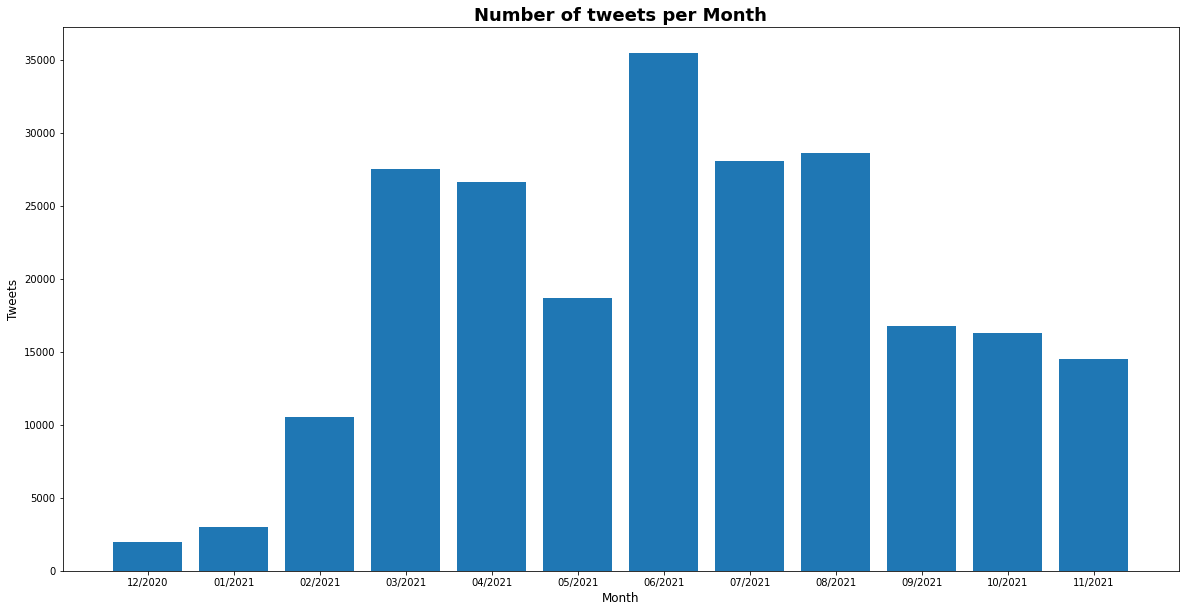

In [ ]:
dataAll = dataAll.set_index(pd.to_datetime(dataAll['date'], format='%Y-%m-%d %H:%M:%S'))

tweetsPerMonth = dataAll.groupby(pd.Grouper(freq="M")).size()
tweetsPerMonth.index = tweetsPerMonth.index.strftime("%m/%Y")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.bar(tweetsPerMonth.index, tweetsPerMonth)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Tweets", fontsize=12)
plt.title("Number of tweets per Month", fontsize=18, fontweight="bold")
plt.show()

dataAll = dataAll.reset_index(drop=True)

Παρατηρούμε ότι υπήρξε πολύ μεγάλη αύξηση στον όγκο των tweets σετικά με τον COVID-19 κατά τους μήνες Φεβρουάριο, Μάρτιο και Ιούνιο του 2021, σχετικά με τους προηγούμενούς τους. Αυτό μπορεί να εξηγηθέι αν ληφθούν υπόψη τα εξής γεγονότα:

**Φεβρουάριος 2021**
* Johnson & Johnson asks the FDA to issue an emergency use authorization for its COVID-19 vaccine.
* Global COVID-19 death toll passes 2.5 million.
* Bahrain becomes the first country to approve the single-dose Johnson & Johnson COVID-19 vaccine for emergency use.

**Μάρτιος 2021**
* The World Health Organization approves Johnson & Johnson's vaccine for emergency use.
* The European Commission proposes an EU vaccine passport: the Digital Green Certificate.
* European Medicine Agency finds no links between AstraZeneca vaccine and increased blood-clotting.
* WHO releases its report on the origins of SARS-CoV-2, finding that animal-to-human transmission was the most likely origin of the virus.

**Ιούνιος 2021**
* WHO approves the Sinovac vaccine for emergency use.
* The world reaches one billion vaccine doses administered.
* China approves Sinovac for use in children as young as three, becoming the first country to approve a COVID-19 vaccine for use among such a young age group.
* WHO announces that the Delta variant is likely to become globally dominant.
* Tokyo cancels all Olympic public viewing events due to COVID-19.
* A study finds that AstraZeneca’s COVID-19 vaccine is effective against the Delta and Kappa variants.
* The European Union reaches 60 percent of adults vaccinated with at least one shot and 41 percent fully vaccinated.

###Ερώτημα 2.6

Από τα αποτελέμσατα των παραπάνω ερωτημάτων παρατηρούνται τα εξής:
* Με βάση τα δεδομένα των ερωτημάτων 2.2 και 2.3, παρατηρούμε ότι το εμβόλιο της Moderna εμφανιζόταν σε πολύ μεγαλύτερο αριθμό tweets σε σχέση με τα εμβόλια των υπόλοιπων εταιρειών. Αξιοσημείωτο, επίσης, είναι το γεγονός ότι το εμβόλιο αυτό εμφανιζόταν τις περισσότερες φορές από κάθε άλλο και στα tweets θετικού και σε αυτά αρνητικού συναισθήματος.
* Από το ερώτημα 2.1 παρατηρούμε ότι παρόλο που ο COVID-19 και τα εμβόλια κατά αυτού υπήρξαν θέμα συζήτησης για πάνω από 12 μήνες, η μεγάλη πλειονότητα (3/4) των tweets σχετικά με αυτά είχε ουδέτερο συναίσθημα, γεγονός που δείχνει ότι οι περισσότεροι άνθρωποι δεν είχαν σχηματίσει συγκεκριμένη άποψη για το θέμα.

##**Ερώτημα 3: Vectorization - Εξαγωγή χαρακτηριστικών**

In [ ]:
trainDf = pd.read_csv(r'/content/gdrive/MyDrive/Data Mining/hw1/train.csv')
x_train = trainDf['text']
y_train = trainDf['sentiment'].tolist()

testDf = pd.read_csv(r'/content/gdrive/MyDrive/Data Mining/hw1/test.csv')
x_test = testDf['text']
y_test = testDf['sentiment'].tolist()

###Ερώτημα 3.1

In [ ]:
type(x_train)

pandas.core.series.Series

In [ ]:
x_train.shape

(18238,)

In [ ]:
x_train.head()

0    bbmp bengaluru covidvaccine availability free ...
1        beloved pm efforts vaccination vaccinecentury
2    age slots covaxin alleviate diagnostic centerr...
3    remove background nowperfectclippingpathab div...
4    baber embarrassing ontario reporting cases cov...
Name: text, dtype: object

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df=0.005)
bow_train = count_vectorizer.fit_transform(x_train.array)
pickle.dump(bow_train, open('/content/gdrive/MyDrive/Data Mining/hw1/bow_train.pkl', 'wb'))

display(pd.DataFrame(np.array(bow_train.toarray()), columns=count_vectorizer.get_feature_names_out()))

,administered,age,aged,ages,already,amp,another,anyone,apollo,approval,...,week,weeks,well,work,world,would,year,years,yesterday,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18236,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18237,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18238,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


###Ερώτημα 3.2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=0.005)
tfidf_train = tfidf_vectorizer.fit_transform(x_train.array)
pickle.dump(tfidf_train, open('/content/gdrive/MyDrive/Data Mining/hw1/tfidf_train.pkl', 'wb'))

display(pd.DataFrame(np.array(tfidf_train.toarray()), columns=tfidf_vectorizer.get_feature_names_out()))

,administered,age,aged,ages,already,amp,another,anyone,apollo,approval,...,week,weeks,well,work,world,would,year,years,yesterday,yet
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.271616,...,0.0,0.000000,0.0,0.0,0.865336,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.581874,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18235,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18236,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.800932,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18237,0.0,0.287453,0.0,0.0,0.0,0.0,0.0,0.0,0.41964,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18238,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.788311,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


###Ερώτημα 3.3

In [ ]:
from gensim.models import Word2Vec

tokens = x_train.apply(lambda x: x.split())
model_w2v = Word2Vec(tokens, size=100, window=5, min_count=10, sg=1, hs=0, negative=10, workers=2, seed=34)
model_w2v.wv.save("/content/gdrive/MyDrive/Data Mining/hw1/model_w2v.pkl")

##**Ερώτημα 4: Classification SVM, KNN, Random Forests**

###Classification χρησιμοποιώντας BoW

In [ ]:
bow_train = pickle.load(open('/content/gdrive/MyDrive/Data Mining/hw1/bow_train.pkl', 'rb'))
bow_test = count_vectorizer.transform(x_test.array)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm

parameters = {'C':[1, 10], 'gamma':('auto', 'scale')}

svc = svm.SVC()
svm_classifier = GridSearchCV(svc, parameters, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
svm_classifier.fit(bow_train, y_train)
svm_bow_prediction = svm_classifier.predict(bow_test)

print("Best hyperparameters for svm classification")
print(svm_classifier.best_params_)
print('Classification using Bag of Words representation and Support Vector Machines')
print(classification_report(y_test, svm_bow_prediction))

Best hyperparameters for svm classification
{'C': 1, 'gamma': 'scale'}
Classification using Bag of Words representation and Support Vector Machines
              precision    recall  f1-score   support

         NEG       0.71      0.14      0.24       588
         NEU       0.80      0.98      0.88      3437
         POS       0.74      0.30      0.43       535

    accuracy                           0.79      4560
   macro avg       0.75      0.47      0.51      4560
weighted avg       0.78      0.79      0.74      4560



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn_classifier = GridSearchCV(knn, param_grid, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
knn_classifier.fit(bow_train, y_train)
knn_bow_prediction = knn_classifier.predict(bow_test)

print("Best hyperparameters for knn classification")
print(knn_classifier.best_params_)
print('Classification using Bag of Words representation and K-nearest neighbors')
print(classification_report(y_test, knn_bow_prediction))

Best hyperparameters for knn classification
{'n_neighbors': 17}
Classification using Bag of Words representation and K-nearest neighbors
              precision    recall  f1-score   support

         NEG       0.58      0.10      0.16       588
         NEU       0.77      0.99      0.86      3437
         POS       0.79      0.04      0.07       535

    accuracy                           0.76      4560
   macro avg       0.71      0.37      0.36      4560
weighted avg       0.74      0.76      0.68      4560



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier()

param_grid = {'bootstrap':[True,False], 'max_depth':[2,10], 'max_features':['auto', 'log2'], 'n_estimators':[int(x) for x in np.linspace(start=10, stop=80, num=10)]}

rf_classifier = GridSearchCV(rf, param_grid, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
rf_classifier.fit(bow_train, y_train)
rf_bow_prediction = rf_classifier.predict(bow_test)

print("Best hyperparameters for rf classification")
print(rf_classifier.best_params_)
print('Classification using Bag of Words representation and random forest')
print(classification_report(y_test, rf_bow_prediction))

Best hyperparameters for rf classification
{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
Classification using Bag of Words representation and random forest
              precision    recall  f1-score   support

         NEG       0.66      0.04      0.07       588
         NEU       0.76      1.00      0.86      3437
         POS       0.83      0.08      0.15       535

    accuracy                           0.76      4560
   macro avg       0.75      0.37      0.36      4560
weighted avg       0.76      0.76      0.68      4560



###Classification χρησιμοποιώντας TF-IDF

In [ ]:
tfidf_train = pickle.load(open('/content/gdrive/MyDrive/Data Mining/hw1/tfidf_train.pkl', 'rb'))
tfidf_test = tfidf_vectorizer.transform(x_test.array)

In [ ]:
parameters = {'C':[1, 10], 'gamma':('auto', 'scale')}

svc = svm.SVC()
svm_classifier = GridSearchCV(svc, parameters, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
svm_classifier.fit(tfidf_train, y_train)
svm_tfidf_prediction = svm_classifier.predict(tfidf_test)

print("Best hyperparameters for svm classification")
print(svm_classifier.best_params_)
print('Classification using TF-IDF representation and Support Vector Machines')
print(classification_report(y_test, svm_tfidf_prediction))

Best hyperparameters for svm classification
{'C': 1, 'gamma': 'scale'}
Classification using TF-IDF representation and Support Vector Machines
              precision    recall  f1-score   support

         NEG       0.62      0.15      0.24       588
         NEU       0.80      0.97      0.88      3437
         POS       0.74      0.31      0.44       535

    accuracy                           0.79      4560
   macro avg       0.72      0.48      0.52      4560
weighted avg       0.77      0.79      0.74      4560



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn_classifier = GridSearchCV(knn, param_grid, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
knn_classifier.fit(tfidf_train, y_train)
knn_tfidf_prediction = knn_classifier.predict(tfidf_test)

print("Best hyperparameters for knn classification")
print(knn_classifier.best_params_)
print('Classification using TF-IDF representation and K-nearest neighbors')
print(classification_report(y_test, knn_tfidf_prediction))

Best hyperparameters for knn classification
{'n_neighbors': 15}
Classification using TF-IDF representation and K-nearest neighbors
              precision    recall  f1-score   support

         NEG       0.52      0.16      0.25       588
         NEU       0.78      0.97      0.87      3437
         POS       0.74      0.17      0.27       535

    accuracy                           0.77      4560
   macro avg       0.68      0.43      0.46      4560
weighted avg       0.74      0.77      0.72      4560



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier()

param_grid = {'bootstrap':[True,False], 'max_depth':[2,10], 'max_features':['auto', 'log2'], 'n_estimators':[int(x) for x in np.linspace(start=10, stop=80, num=10)]}

rf_classifier = GridSearchCV(rf, param_grid, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
rf_classifier.fit(tfidf_train, y_train)
rf_tfidf_prediction = rf_classifier.predict(tfidf_test)

print("Best hyperparameters for rf classification")
print(rf_classifier.best_params_)
print('Classification using TF-IDF representation and random forest')
print(classification_report(y_test, rf_tfidf_prediction))

Best hyperparameters for rf classification
{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
Classification using TF-IDF representation and random forest
              precision    recall  f1-score   support

         NEG       0.76      0.03      0.06       588
         NEU       0.76      1.00      0.86      3437
         POS       0.90      0.05      0.10       535

    accuracy                           0.76      4560
   macro avg       0.81      0.36      0.34      4560
weighted avg       0.78      0.76      0.67      4560



###Classification χρησιμοποιώντας Word Embeddings

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load("/content/gdrive/MyDrive/Data Mining/hw1/model_w2v.pkl")
w2v_train = [text.split() for text in x_train]
w2v_test = [text.split() for text in x_test]

In [ ]:
def averageVector(words, model, max_features):
    feature_vec = np.zeros((max_features,))
    wordCount = 0
    w2v_vocab = set(model.index2word)

    for word in words:
        if word in w2v_vocab:
            wordCount += 1
            feature_vec = np.add(feature_vec,model[word])
    if wordCount != 0:
      feature_vec = np.divide(feature_vec, wordCount)
    return feature_vec


def textVector(text, model, max_features):
    textFeatureVectors = np.zeros((len(text),max_features))

    for index,value in enumerate(text):
        textFeatureVectors[index] = averageVector(value, model, max_features)
    return textFeatureVectors

trainVectors = textVector(w2v_train,model,100)
testVectors = textVector(w2v_test,model,100)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm

parameters = {'C':[1, 10], 'gamma':('auto', 'scale')}

svc = svm.SVC()
svm_classifier = GridSearchCV(svc, parameters, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
svm_classifier.fit(trainVectors, y_train)
svm_w2v_prediction = svm_classifier.predict(testVectors)

print("Best hyperparameters for svm classification")
print(svm_classifier.best_params_)
print('Classification using Word Embeddings representation and Support Vector Machines')
print(classification_report(y_test, svm_w2v_prediction))

Best hyperparameters for svm classification
{'C': 10, 'gamma': 'scale'}
Classification using Word Embeddings representation and Support Vector Machines
              precision    recall  f1-score   support

         NEG       0.69      0.10      0.17       588
         NEU       0.77      0.99      0.87      3437
         POS       0.93      0.05      0.10       535

    accuracy                           0.77      4560
   macro avg       0.80      0.38      0.38      4560
weighted avg       0.78      0.77      0.69      4560



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn_classifier = GridSearchCV(knn, param_grid, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
knn_classifier.fit(trainVectors, y_train)
knn_w2v_prediction = knn_classifier.predict(testVectors)

print("Best hyperparameters for knn classification")
print(knn_classifier.best_params_)
print('Classification using Word Embeddings representation and K-nearest neighbors')
print(classification_report(y_test, knn_w2v_prediction))

Best hyperparameters for knn classification
{'n_neighbors': 30}
Classification using Word Embeddings representation and K-nearest neighbors
              precision    recall  f1-score   support

         NEG       0.54      0.20      0.29       588
         NEU       0.78      0.97      0.86      3437
         POS       0.49      0.07      0.12       535

    accuracy                           0.76      4560
   macro avg       0.60      0.41      0.42      4560
weighted avg       0.71      0.76      0.70      4560



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier()

param_grid = {'bootstrap':[True,False], 'max_depth':[2,10], 'max_features':['auto', 'log2'], 'n_estimators':[int(x) for x in np.linspace(start=10, stop=80, num=10)]}

rf_classifier = GridSearchCV(rf, param_grid, cv=10, scoring=['accuracy', 'recall_micro', 'precision_micro', 'f1_micro'], refit='accuracy')
rf_classifier.fit(trainVectors, y_train)
rf_w2v_prediction = rf_classifier.predict(testVectors)

print("Best hyperparameters for rf classification")
print(rf_classifier.best_params_)
print('Classification using Word Embeddings representation and random forest')
print(classification_report(y_test, rf_w2v_prediction))

Best hyperparameters for rf classification
{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 33}
Classification using Word Embeddings representation and random forest
              precision    recall  f1-score   support

         NEG       0.71      0.15      0.25       588
         NEU       0.77      0.99      0.87      3437
         POS       0.74      0.03      0.06       535

    accuracy                           0.77      4560
   macro avg       0.74      0.39      0.39      4560
weighted avg       0.76      0.77      0.69      4560

